## Курсовой проект
### Исследование тематики пользовательских публикаций в социальных сетях

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

In [4]:
sns.set_theme(style='darkgrid', palette='viridis')

Загрузка данных:

In [5]:
sentiment = pd.read_csv('sentimentdataset.csv')

In [6]:
sentiment.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


Определим размеры набора данных.

In [7]:
sentiment.shape

(732, 15)

In [8]:
sentiment.size

10980

In [9]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [10]:
sentiment.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


### Исследование данных

#### Обработка данных

Подсчитаем объем отсутствующих значений.

In [11]:
def counting_missing_data(sentiment: pd.DataFrame) -> pd.DataFrame:
    data = pd.DataFrame(sentiment.isna().sum(), columns=['Отсутствует'])
    data['В процентах'] = data['Отсутствует'] / len(data) * 100
    data['Тип данных'] = sentiment.dtypes
    return data.style.background_gradient(cmap='viridis').format({
            'Отсутствует': '{:d}'.format,
            'В процентах': '{:,.2%}'.format,
            })

In [12]:
counting_missing_data(sentiment)

,Отсутствует,В процентах,Тип данных
Unnamed: 0.1,0,0.00%,int64
Unnamed: 0,0,0.00%,int64
Text,0,0.00%,object
Sentiment,0,0.00%,object
Timestamp,0,0.00%,object
User,0,0.00%,object
Platform,0,0.00%,object
Hashtags,0,0.00%,object
Retweets,0,0.00%,float64
Likes,0,0.00%,float64


Следовательно, датасет не имеет NaN-значений.

Удалим столбцы **User** и **Hashtags**, а также **Hour**: первые два не несут важной информации, информация из последнего дублируется в столбце **Timestamp**.

In [13]:
sentiment.drop(['User', 'Hashtags', 'Hour'], axis=1, inplace=True)

Удалим стобцы **Unnamed: 0** и **Unnamed: 0.1**.

In [14]:
sentiment.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [15]:
columns = dict(Text='Текст публикации', Sentiment='Настроение', Timestamp='Временная метка', Platform='Социальная сеть', 
               Retweets='Ретвиты / ответы', Likes='Отметки "Мне нравится"', Country='Страна', Year='Год', Month='Месяц', Day='День')
sentiment.rename(columns=columns, inplace=True)

In [16]:
sentiment.head()

,Текст публикации,Настроение,Временная метка,Социальная сеть,Ретвиты / ответы,"Отметки ""Мне нравится""",Страна,Год,Месяц,День
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,Twitter,15.0,30.0,USA,2023,1,15
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,Twitter,5.0,10.0,Canada,2023,1,15
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,Instagram,20.0,40.0,USA,2023,1,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,Facebook,8.0,15.0,UK,2023,1,15
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,Instagram,12.0,25.0,Australia,2023,1,15


Преобразуем тип данных колонки **Timestamp**:

In [17]:
sentiment['Временная метка'] = pd.to_datetime(sentiment['Временная метка'])

Проверим, чисты ли данные в столбцах.

In [18]:
def remove_spaces(df: pd.DataFrame) -> pd.DataFrame:
    for column in df.columns:
        if df[column].dtype == 'O':
            df[column] = df[column].str.strip()
    return df

In [19]:
sentiment = remove_spaces(sentiment)

In [20]:
sentiment.head()

,Текст публикации,Настроение,Временная метка,Социальная сеть,Ретвиты / ответы,"Отметки ""Мне нравится""",Страна,Год,Месяц,День
0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,Twitter,15.0,30.0,USA,2023,1,15
1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,Twitter,5.0,10.0,Canada,2023,1,15
2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,Instagram,20.0,40.0,USA,2023,1,15
3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,Facebook,8.0,15.0,UK,2023,1,15
4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,Instagram,12.0,25.0,Australia,2023,1,15


#### Подготовка данных для регрессионного анализа

Для дальнейшей работы подготовим еще один датасет и сразу удалим из него столбцы **Text** и **Timestamp**:

In [21]:
sentiment_copy = sentiment.copy('Deep')
sentiment_copy.drop(['Текст публикации', 'Временная метка', 'День', 
                     'Месяц', 'Год'], axis=1, inplace=True)

In [22]:
# Выберем только те колонки, что содержат текстовые значения, а также сохраним в отдельную
# переменную колонки с числовыми значениями
sent_objs = sentiment_copy.select_dtypes(include='object')
sent_nums = sentiment_copy.select_dtypes(exclude='object')

# Для столбцов с текстовыми значениями создадим dummy-переменные, которые исключат линейную зависимость между переменными
sent_objs = pd.get_dummies(sent_objs, dtype=int)

In [23]:
final_sentiment = pd.concat([sent_nums, sent_objs], axis=1)
final_sentiment

,Ретвиты / ответы,"Отметки ""Мне нравится""",Настроение_Acceptance,Настроение_Accomplishment,Настроение_Admiration,Настроение_Adoration,Настроение_Adrenaline,Настроение_Adventure,Настроение_Affection,Настроение_Amazement,...,Страна_Peru,Страна_Portugal,Страна_Scotland,Страна_South Africa,Страна_Spain,Страна_Sweden,Страна_Switzerland,Страна_Thailand,Страна_UK,Страна_USA
0,15.0,30.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.0,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20.0,40.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8.0,15.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,12.0,25.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,20.0,39.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,25.0,48.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
729,22.0,42.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
730,21.0,43.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Визуализация данных

In [24]:
from matplotlib.patches import ConnectionPatch

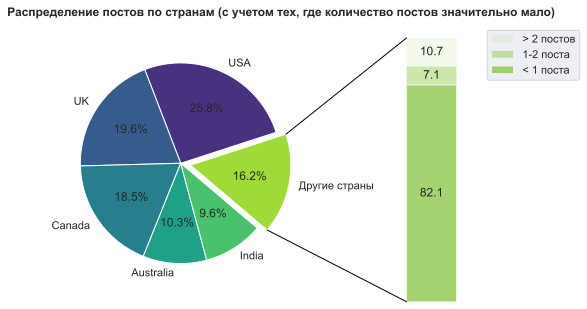

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

data = np.round(sentiment['Страна'].value_counts() / len(sentiment) * 100, 1)
labels = data.keys()[:5].tolist() + ['Другие страны']

# Параметры круговой диаграммы
overall_ratios = data[data > 2.5].tolist()
overall_ratios.append(np.round(data[data < 2.5].sum(), 1))
startangle = 180 * overall_ratios[5]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=startangle, labels=labels,
                     colors=sns.color_palette('viridis'), explode=[0, 0, 0, 0, 0, .1])

# Параметры шкалы
other_ratios = []
other_ratios += [data[data < 1].size, 
                 data[data.between(1, 1.9)].size, 
                 data[data.between(2, 2.5)].size]
sum_ratios = sum(other_ratios)
other_ratios = [np.round(item / sum_ratios * 100, 1) for item in other_ratios]
other_labels = ['< 1 поста', '1-2 поста', '> 2 постов']

bottom = 1; width = .2

for j, (height, label) in enumerate(reversed([*zip(other_ratios, other_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='#80c136', label=label,
                 alpha=.1 + .3 * j)
    ax2.bar_label(bc, label_type='center')
    
ax2.legend(bbox_to_anchor=(.7, 1))
ax2.axis('off')
ax2.set_title('Распределение постов по странам (с учетом тех, где количество постов значительно мало)', 
              fontweight='bold', x=-.1, y=1.01)
ax2.set_xlim(- 2.5 * width, 2.5 * width)

theta1, theta2 = wedges[5].theta1, wedges[5].theta2
center, r = wedges[5].center, wedges[5].r
bar_height = sum(other_ratios)

# Верхнее соединение
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 1), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color('#000000')
con.set_linewidth(1)
ax2.add_artist(con)

# Нижнее соединение
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, -bar_height + 1), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color('#000000')
ax2.add_artist(con)
con.set_linewidth(1)

plt.show(); 

Следовательно, наибольшее количество публикаций было сделано гражданами США. В часть *Другие страны* вошли те страны, чьи граждане почти не делали публикаций: 82% из них, в общей сложности, сделали меньше 1 поста за все время наблюдений.

In [26]:
months = {1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь',
          7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'
          }

In [27]:
map_month = sentiment['Месяц'].sort_values().map(months).values

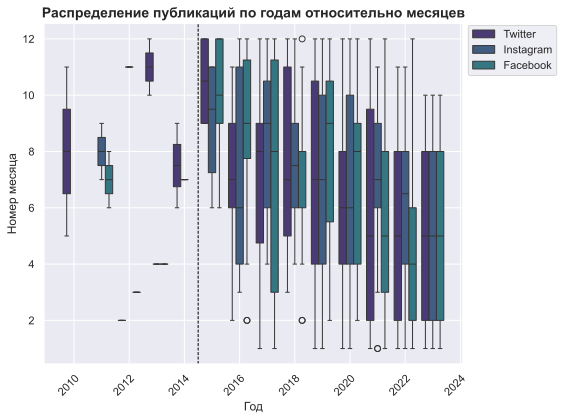

In [28]:
ax = sns.boxplot(data=sentiment, x='Год', y='Месяц', hue='Социальная сеть', native_scale=True)
ax.set_ylabel('Номер месяца')

ax.axvline(2014.5, color=".3", dashes=(2, 1))

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

plt.title('Распределение публикаций по годам относительно месяцев',
          fontsize=14, fontweight='bold')

plt.legend(bbox_to_anchor=(1, 1.01))
plt.tight_layout(); 

Из результатов графика можно сделать вывод: наибольшее число публикаций было сделано в период с 2015 года по 2023, причем на всех трех платформах. В этот же период наблюдается "взрыв" публикаций в течение года. 

Рассмотрим данные, начиная с 2020 года. Получим данные:

In [29]:
temp = sentiment[sentiment['Временная метка'].dt.year >= 2020][['Временная метка', 'Ретвиты / ответы', 'Отметки "Мне нравится"', 'Социальная сеть']]

In [30]:
temp.index = pd.to_datetime(temp['Временная метка'])
temp = temp.drop_duplicates().drop('Временная метка', axis=1).sort_index()

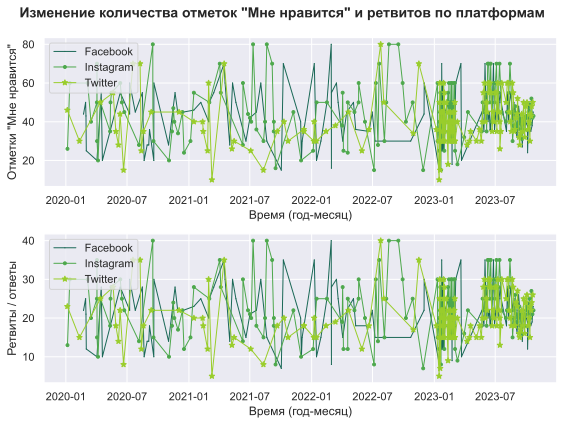

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1)
platforms = np.unique(temp['Социальная сеть'])
markers = (',', '.', '*')
colors = ['#1a6856', '#4da84c', '#99cd2b']

for i, col in zip(range(2), ('Отметки "Мне нравится"', 'Ретвиты / ответы')):
    for j, target, marker, color in zip(range(3), platforms, markers, colors):
        ax[i].plot(temp[temp['Социальная сеть'] == target][col], linewidth=1, 
                   marker=marker, color=color)
    ax[i].set_xlabel('Время (год-месяц)')
    ax[i].set_ylabel(col)
    ax[i].legend(platforms, loc='upper left')
    
plt.suptitle('Изменение количества отметок "Мне нравится" и ретвитов по платформам',
          fontsize=14, fontweight='bold')
plt.tight_layout(); 

В целом, на всех платформах в течение наблюдаемого времени ситуация по количеству отметок "Мне нравится" и ретвитам / ответам схожая, изменения незначительны. Это можно объяснить двумя причинами: *а.* именно в этот период наблюдается рост интереса к социальным сетям и разнообразным блогам; *б.* это последствия предварительной обработки данных, до публикации датасета для широкого доступа. 

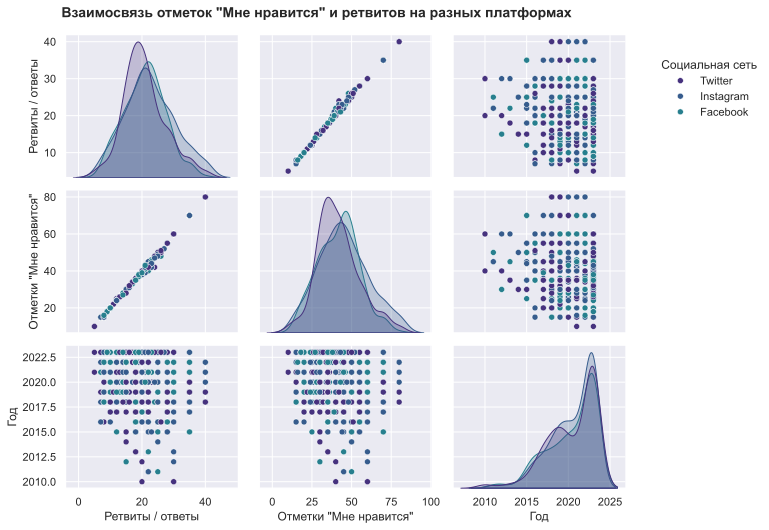

In [32]:
ax = sns.pairplot(data=sentiment[['Ретвиты / ответы', 'Отметки "Мне нравится"', 'Год', 
                                  'Социальная сеть']], hue='Социальная сеть')
sns.move_legend(ax, 'upper right', bbox_to_anchor=(1.2, .9))


plt.suptitle('Взаимосвязь отметок "Мне нравится" и ретвитов на разных платформах',
          fontsize=14, fontweight='bold')
plt.tight_layout(); 

Как видно, изменения ретвитов и отметок "Мне нравится" относительно платформ схожи. При этом важно заметить: увеличение количества ретвитов влечет за собой увеличение количества отметок "Мне нравится" и наоборот, их зависимость приближена к линейной.

### Корреляционный и регрессионный анализ

#### Матрица корреляции

In [33]:
sentiment_matr = sentiment.copy('Deep')
sentiment_matr.drop(['Текст публикации', 'Временная метка'], axis=1, inplace=True)

In [34]:
def to_digits(df: pd.DataFrame) -> pd.DataFrame:
    for column in df.columns:
        if df[column].dtype == 'O':
            temp = df[column].unique()
            temp_dict =  {k: v for (k, v) in zip(temp, range(len(temp)))}
            df[column] = df[column].map(temp_dict)
    return df

In [35]:
corr = to_digits(sentiment_matr).corr()

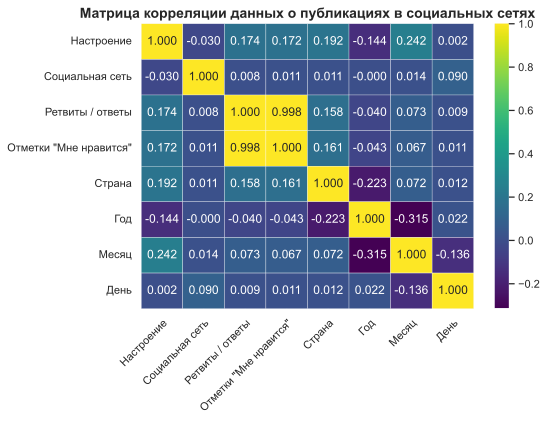

In [36]:
ax = sns.heatmap(data=corr, cmap='viridis', annot=True, fmt=".3f", linewidth=0.3)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

plt.title('Матрица корреляции данных о публикациях в социальных сетях', 
          fontsize=14, fontweight='bold')
plt.tight_layout(); 

Со столбцом **Likes** особенно сильно коррелирует столбец **Retweets**, при этом остальные признаки оказывают минимальное влияние. В целом по матрице можно сделать вывод, что данные почти не взаимосвязаны. Это может крайне негативно сказаться на предсказаниях модели машинного обучения, так как подобные данные приведут к огромному количеству ошибок.

Разобьем данные на два набора: набор признаков и целевую переменную. В качестве целевой переменной будем использовать столбец **Likes**. 

In [37]:
X = final_sentiment.drop('Отметки "Мне нравится"', axis=1)
y = final_sentiment['Отметки "Мне нравится"']

Далее разобьем наборы на тестовые и обучающие наборы данных:

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

Масштабируем данные:

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Линейная регрессия

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [41]:
test_predictions = model.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [43]:
pd.DataFrame(data=(MAE, MSE, RMSE), columns=['Результат'], index=['MAE', 'MSE', 'RMSE'])

,Результат
MAE,0.515099
MSE,0.532643
RMSE,0.729824


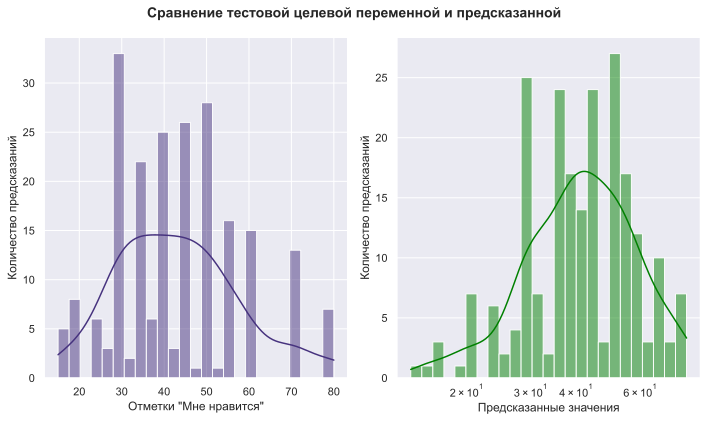

In [44]:
df_for_hist = pd.DataFrame(y_test)

fig, ax = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(10, 6))
sns.histplot(data=df_for_hist, x='Отметки "Мне нравится"', bins=25, ax=ax[0], kde=True)
ax[0].set(xlabel='Отметки "Мне нравится"', ylabel='Количество предсказаний')

sns.histplot(data=test_predictions, bins=25, color='green', 
             ax=ax[1], kde=True, log_scale=True)
ax[1].set(xlabel='Предсказанные значения', ylabel='Количество предсказаний')

plt.suptitle('Сравнение тестовой целевой переменной и предсказанной', 
             fontsize=14, fontweight='bold')
plt.tight_layout(); 

Как и ожидалось, отсутствие каких-либо взаимосвязей привело к тому, что предсказать машинными методами количество отметок "Мне нравится", используя набор признаков из стран, настроений публикаций, количества ретвитов и платформы, на которой был опубликован пост, *крайне сложно*. 

#### Полиномиальная регрессия

Для подтверждения отрицательного результата запустим модель полиномиальной регрессии.

In [45]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=.3, random_state=42)

model_poly = LinearRegression(fit_intercept=True)
model_poly.fit(X_train, y_train)

test_predictions_poly = model_poly.predict(X_test)

In [46]:
MAE = mean_absolute_error(y_test, test_predictions_poly)
MSE = mean_squared_error(y_test, test_predictions_poly)
RMSE = np.sqrt(MSE)

In [47]:
pd.DataFrame(data=(MAE, MSE, RMSE), columns=['Результат'], index=['MAE', 'MSE', 'RMSE'])

,Результат
MAE,1.059837
MSE,2.687487
RMSE,1.639356


Итоговое сравнение предсказанных значений двух моделей:

In [48]:
indexes = np.arange(len(test_predictions))

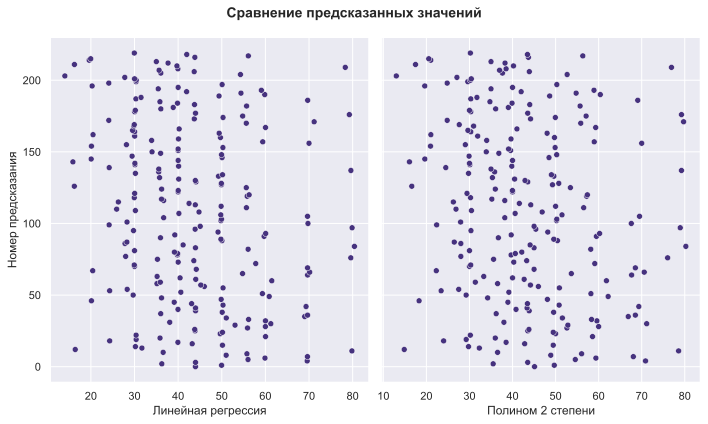

In [49]:
fig, ax = plt.subplots(ncols=2, sharex=False, sharey=True, figsize=(10, 6))

for data, i, text in zip((test_predictions, test_predictions_poly), range(2),
                         ('Линейная регрессия', 'Полином 2 степени')):
    sns.scatterplot(x=data, y=indexes,  ax=ax[i])
    ax[i].set(xlabel=f'{text}', ylabel='Номер предсказания')

plt.suptitle('Сравнение предсказанных значений', 
             fontsize=14, fontweight='bold')
plt.tight_layout(); 

**Вывод:** обе модели одинаково плохо предсказали значения целевой переменной. Как и утверждалось ранее, это результат отсутствия взаимосвязей в датасете, корреляции между признаками и целевой переменной. Результаты можно теоретически улучшить, если добавить в датасет такие данные, которые бы коррелировали с целевой переменной.

### Обработка естественного языка

In [50]:
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [51]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [52]:
def tokenizer(text: string) -> string:
    # Удаляем цифры из строки
    text = re.sub('[a-zA-Z]*[0-9][a-zA-Z]*', '', text)
    # Удаляем пунктуацию из строки
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Удаляем эмодзи из строки
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = ' '.join(text.split())

    # Получим список отдельных слов-токенов и 
    # сведем слова к корневой форме при условии, что слова не в списке стоп-слов
    tokenize_text = [stemmer.stem(token) for token in word_tokenize(text) if token not in stop_words]
    
    return ' '.join(tokenize_text)

In [53]:
sentiment['Новый текст публикации'] = sentiment['Текст публикации'].apply(tokenizer)

In [54]:
sentiment.head()

,Текст публикации,Настроение,Временная метка,Социальная сеть,Ретвиты / ответы,"Отметки ""Мне нравится""",Страна,Год,Месяц,День,Новый текст публикации
0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,Twitter,15.0,30.0,USA,2023,1,15,enjoy beauti day park
1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,Twitter,5.0,10.0,Canada,2023,1,15,traffic terribl morn
2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,Instagram,20.0,40.0,USA,2023,1,15,just finish amaz workout
3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,Facebook,8.0,15.0,UK,2023,1,15,excit upcom weekend getaway
4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,Instagram,12.0,25.0,Australia,2023,1,15,tri new recip dinner tonight


In [55]:
sia = SentimentIntensityAnalyzer()
sentiment['Оценки'] = sentiment['Новый текст публикации'].apply(lambda text: sia.polarity_scores(text)['compound'])
sentiment['Новое настроение'] = sentiment['Оценки'].apply(lambda score: 'Позитивное' if score >= .05 else
                                                       ('Негативное' if score <= -.05 else 'Нейтральное'))

In [56]:
sentiment[['Новый текст публикации', 'Оценки', 'Новое настроение']]

,Новый текст публикации,Оценки,Новое настроение
0,enjoy beauti day park,0.4939,Позитивное
1,traffic terribl morn,0.0000,Нейтральное
2,just finish amaz workout,0.0000,Нейтральное
3,excit upcom weekend getaway,0.0000,Нейтральное
4,tri new recip dinner tonight,0.0000,Нейтральное
...,...,...,...
727,collabor scienc project receiv recognit region...,0.7845,Позитивное
728,attend surpris birthday parti organ friend sur...,0.9260,Позитивное
729,success fundrais school chariti initi the joy ...,0.8176,Позитивное
730,particip multicultur festiv celebr divers musi...,0.0000,Нейтральное


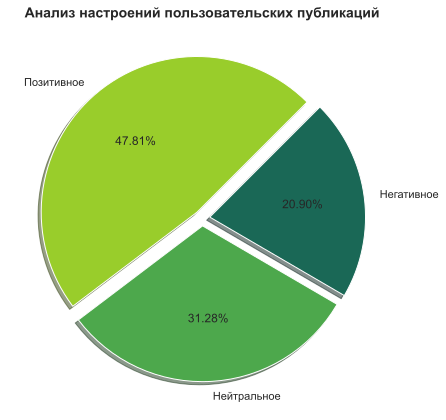

In [57]:
fig, ax = plt.subplots()
colors = ['#99cd2b', '#4da84c', '#1a6856']

pieces = sentiment['Новое настроение'].value_counts().tolist()
ax.pie(pieces, labels=list(sentiment['Новое настроение'].unique()), explode=(.05, .05, .05),
       autopct='%.2f%%', startangle=45, shadow=True, colors=colors)

plt.title('Анализ настроений пользовательских публикаций', 
             fontsize=14, fontweight='bold')
plt.tight_layout(); 

Посмотрим распределение настроений по тем странам, где количество публикаций самое большое:

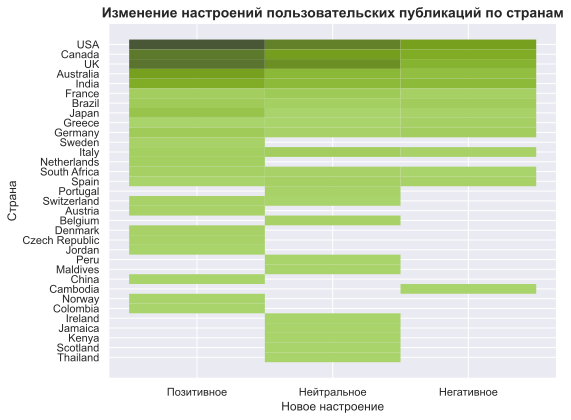

In [58]:
sns.histplot(data=sentiment, x='Новое настроение', y='Страна', color='#99cd2b')

plt.title('Изменение настроений пользовательских публикаций по странам',
          fontsize=14, fontweight='bold')

plt.tight_layout(); 

**Вывод:** граждане США - самые позитивные. После них идут граждане Канады и подданные Великобритании.

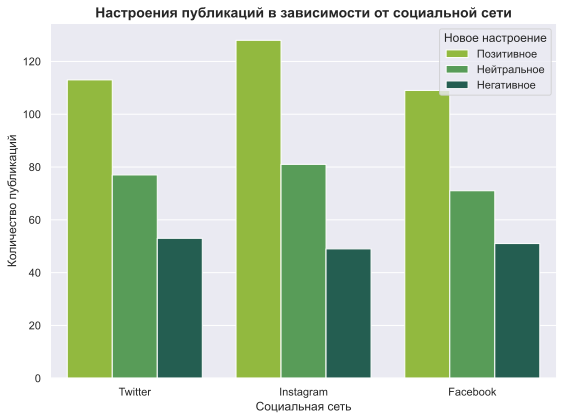

In [59]:
colors = ['#99cd2b', '#4da84c', '#1a6856']
ax = sns.countplot(data=sentiment, hue='Новое настроение', x='Социальная сеть', palette=colors)
ax.set_ylabel('Количество публикаций')

plt.title('Настроения публикаций в зависимости от социальной сети',
          fontsize=14, fontweight='bold')

plt.tight_layout(); 

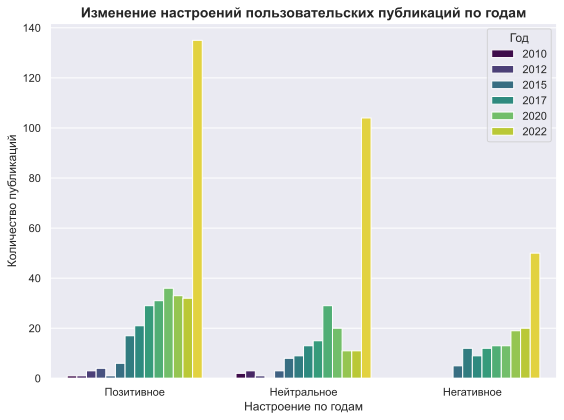

In [60]:
sns.countplot(data=sentiment, x='Новое настроение', hue='Год', palette='viridis')

plt.xlabel('Настроение по годам'); plt.ylabel('Количество публикаций')

plt.title('Изменение настроений пользовательских публикаций по годам',
          fontsize=14, fontweight='bold')

plt.tight_layout(); 

Произошедшее к 2022 году увеличение числа публикаций на всех платформах привело к кратному увеличению публикаций всех типов настроений.

Расмотрим самые часто упоминающиеся слова для 2022 года:

In [61]:
words_2022 = ''.join(word for text in sentiment[sentiment['Год'] == 2022]['Новый текст публикации'] for word in text)

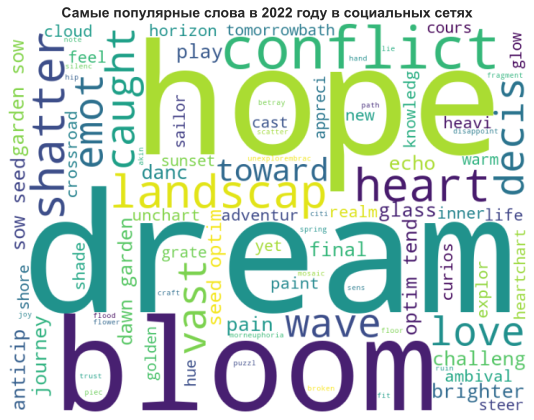

In [62]:
plt.figure()

wordcloud = WordCloud(width=800, height=600,
                background_color='white',
                min_font_size=10).generate(words_2022)

plt.imshow(wordcloud)
plt.axis("off")

plt.title('Самые популярные слова в 2022 году в социальных сетях',
          fontsize=14, fontweight='bold')

plt.tight_layout(); 